Model to predict NBA game

In [0]:
pip install sportsreference

     |████████████████████████████████| 378kB 9.3MB/s 


Load Data using sportsreference

In [0]:
from sportsreference.nba.teams import Teams
from sportsreference.nba.schedule import Schedule
import sportsreference.nba as nba
import numpy as np
import matplotlib.pyplot as plt

Perform Opperations on the data

In [0]:
team_point = {}
team_opp_point = {}
team_differential = {}
win = {}
losses = {}
for team in Teams(2018):
  tot_wins = 0
  names = team.abbreviation
  sch = Schedule(names, 2018)
  tot_wins = sch.dataframe['wins'].iloc[81]
  win[names] = tot_wins
  opp_points = team.opp_points
  team_points = team.points
  team_point[names] = team_points
  team_opp_point[names] = team_opp_point
  team_differential[names] = team_points - opp_points

Graph Point Differential vs Wins

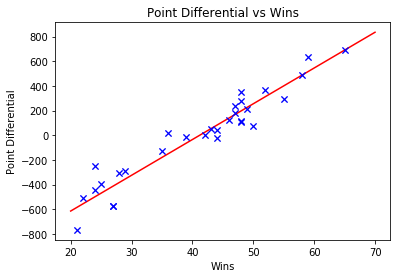

In [0]:
y = lambda b0, b1, x: b0 + b1*x
b0 = -1195
b1 = 29
domain = np.linspace(20, 70 ,100, dtype=float)
values = y(b0, b1, domain)

fig, ax = plt.subplots(1,1)
ax.plot(domain, values, 'r')
ax.plot(list(win.values()), list(team_differential.values()), 'bx')
ax.set_title('Point Differential vs Wins')
ax.set_xlabel('Wins')
ax.set_ylabel('Point Differential')
ax.plot(list(win.values()), list(team_differential.values()), 'bx')

Calculate Effective Field Goal Percentage

In [0]:
team = Teams('2018')
fgAttempts = team.dataframes['field_goal_attempts']
fgMade = team.dataframes['field_goals']
threePtFg = team.dataframes['three_point_field_goals']
eFG = (fgMade + (0.5 * threePtFg))/fgAttempts

Graph Effective Field Goal Percentage

Text(0, 0.5, 'eFG')

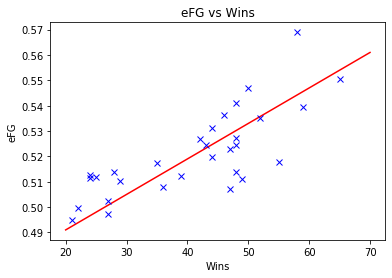

In [0]:
y = lambda b0, b1, x: b0 + b1*x
b0 = 0.463
b1 = 0.0014
domain = np.linspace(20, 70 ,100, dtype=float)
values = y(b0, b1, domain)

fig, ax = plt.subplots(1,1)
ax.plot(domain, values, 'r')
plt.plot(list(win.values()), eFG, 'bx')
ax.set_title('eFG vs Wins')
ax.set_xlabel('Wins')
ax.set_ylabel('eFG')

Calculate True Shooting Percentage

In [0]:
team = Teams('2018')
fgAttempts = team.dataframes['field_goal_attempts']
fgMade = team.dataframes['field_goals']
threePtFg = team.dataframes['three_point_field_goals']
free_attempt = team.dataframes['free_throw_attempts']
points = team.dataframes['points']
TSA = (fgAttempts + (0.44 * free_attempt))
TSP = (points / (2 * TSA))

Graph True Shooting Percentage vs Wins

Text(0, 0.5, 'TSP')

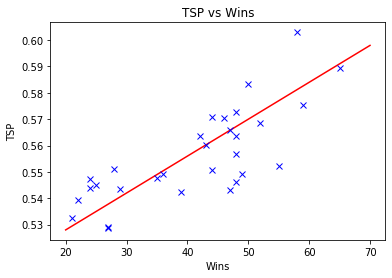

In [0]:
y = lambda b0, b1, x: b0 + b1*x
b0 = 0.5
b1 = 0.0014
domain = np.linspace(20, 70 ,100, dtype=float)
values = y(b0, b1, domain)

fig, ax = plt.subplots(1,1)
ax.plot(domain, values, 'r')
plt.plot(list(win.values()), TSP, 'bx')
ax.set_title('TSP vs Wins')
ax.set_xlabel('Wins')
ax.set_ylabel('TSP')

Evaluating Point Differential

In [0]:
team_point = {}
team_opp_point = {}
team_differential = {}

for team in Teams(2018):
  names = team.abbreviation
  team_point[names] = team.points
  team_opp_point[names] = team.opp_points
  team_differential[names] = team_point[names] - team_opp_point[names]

In [0]:
Numright = 0
Numwrong = 0
accuracyMatrix = 0
accuracyMatrix = {"TruePositive":0, "FalsePositive":0, "TrueNegative":0, "FalseNegative":0}
for team in Teams(2019):
  sch = Schedule(team.abbreviation)
  for game in sch:
    prediction = ""
    game_result = game.result
    opp_name = game.opponent_abbr
    name = team.abbreviation
    opp_val = team_differential[opp_name]
    team_val = team_differential[name]
 
    if(team_val >= opp_val):
      prediction = "Win"
    if(team_val < opp_val):
      prediction = "Loss"
    if(prediction == "Win" and game_result == "Win"):
      accuracyMatrix["TruePositive"] +=1
      Numright += 1
    if(prediction == "Win" and game_result == "Loss"):
      accuracyMatrix["FalsePositive"] +=1
      Numwrong+=1
    if(prediction == "Loss" and game_result == "Loss"):
      accuracyMatrix["TrueNegative"] +=1
      Numright += 1
    if(prediction == "Loss" and game_result == "Win"):
      accuracyMatrix["FalseNegative"] +=1
      Numwrong += 1

Results:

In [0]:
print(accuracyMatrix)
print("NBA game prediction accuracy: ", np.float((Numright/(Numright+Numwrong))))

{'TruePositive': 1111, 'FalsePositive': 119, 'TrueNegative': 131, 'FalseNegative': 1099}
NBA game prediction accuracy:  0.5048780487804878


Code for Classifier

Point Differential

In [0]:
team_point = {}
team_opp_point = {}
team_differential = {}

for team in Teams(2018):
  names = team.abbreviation
  team_point[names] = team.points
  team_opp_point[names] = team.opp_points
  team_differential[names] = team_point[names] - team_opp_point[names]

True Shooting Percentage

In [0]:
TSP = {}
for team in Teams(2018):
  names = team.abbreviation
  fga = team.field_goal_attempts
  fg = team.field_goals
  threept = team.three_point_field_goals
  freethrow = team.free_throw_attempts
  points = team.points
  TSA = np.float((fga + (0.44 * freethrow)))
  TSP[names] = np.float((points / (2 * TSA)))

EFG

In [0]:
EFG = {}
for team in Teams(2018):
  names = team.abbreviation
  fga = team.field_goal_attempts
  fg = team.field_goals
  threept = team.three_point_field_goals
  EFG[names] = np.float((fg + (0.5 * threept)) / fga)

TOV

In [0]:
TOV = {}
for team in Teams(2018):
  names = team.abbreviation
  turnovers = team.turnovers
  fga = team.field_goal_attempts
  fta = team.free_throw_attempts
  TOV[names] = np.float((100 * turnovers) / (fga + (0.44*fta) + turnovers))

Rebounds = combination of OR% and DR%

In [0]:
REB = {}
for team in Teams(2018):
  names = team.abbreviation
  turnovers = team.turnovers
  fga = team.field_goal_attempts
  fta = team.free_throw_attempts
  OffReb = team.offensive_rebounds
  Opp_Of_Reb = team.opp_offensive_rebounds
  DefReb = team.defensive_rebounds
  Opp_Df_Reb = team.opp_defensive_rebounds
  OR = np.float(OffReb / (OffReb + Opp_Df_Reb))
  DR = np.float(DefReb / (Opp_Of_Reb + DefReb))
  REB[names] = np.float(OR + DR)

Free Throw

In [0]:
FreeThrow = {}
for team in Teams(2018):
  names = team.abbreviation
  ft = team.free_throws
  fga = team.field_goal_attempts
  FreeThrow[names] = np.float(ft/fga)

Classifier Standard values

In [0]:
Numright = 0
Numwrong = 0
accuracyMatrix = 0
accuracyMatrix = {"TruePositive":0, "FalsePositive":0, "TrueNegative":0, "FalseNegative":0}
for team in Teams(2019):
  sch = Schedule(team.abbreviation)
  for game in sch:
    prediction = ""
    game_result = game.result
    opp_name = game.opponent_abbr
    name = team.abbreviation
    opp_val = np.float(0.4*TSP[opp_name] + 0.25*TOV[opp_name] + 0.20*REB[opp_name] + 0.15*FreeThrow[opp_name] + 0.2*team_differential[opp_name])
    team_val = np.float(0.4*TSP[name] + 0.25*TOV[name] + 0.20*REB[name] + 0.15*FreeThrow[name]+ 0.2*team_differential[name])
 
    if(team_val >= opp_val):
      prediction = "Win"
    if(team_val < opp_val):
      prediction = "Loss"
    if(prediction == "Win" and game_result == "Win"):
      accuracyMatrix["TruePositive"] +=1
      Numright += 1
    if(prediction == "Win" and game_result == "Loss"):
      accuracyMatrix["FalsePositive"] +=1
      Numwrong+=1
    if(prediction == "Loss" and game_result == "Loss"):
      accuracyMatrix["TrueNegative"] +=1
      Numright += 1
    if(prediction == "Loss" and game_result == "Win"):
      accuracyMatrix["FalseNegative"] +=1
      Numwrong += 1


Ouput:

In [0]:
print(accuracyMatrix)
print("NBA game prediction accuracy: ", np.float((Numright/(Numright+Numwrong))))

{'TruePositive': 1111, 'FalsePositive': 119, 'TrueNegative': 131, 'FalseNegative': 1099}
NBA game prediction accuracy:  0.5048780487804878


Classifier: Higher TSP and Rebounds

In [0]:
Numright = 0
Numwrong = 0
accuracyMatrix = 0
accuracyMatrix = {"TruePositive":0, "FalsePositive":0, "TrueNegative":0, "FalseNegative":0}
for team in Teams(2019):
  sch = Schedule(team.abbreviation)
  for game in sch:
    prediction = ""
    game_result = game.result
    opp_name = game.opponent_abbr
    name = team.abbreviation
    opp_val = np.float(0.8*TSP[opp_name] + 0.25*TOV[opp_name] + 0.8*REB[opp_name] + 0.15*FreeThrow[opp_name] + 0.2*team_differential[opp_name])
    team_val = np.float(0.8*TSP[name] + 0.25*TOV[name] + 0.8*REB[name] + 0.15*FreeThrow[name]+ 0.2*team_differential[name])
 
    if(team_val >= opp_val):
      prediction = "Win"
    if(team_val < opp_val):
      prediction = "Loss"
    if(prediction == "Win" and game_result == "Win"):
      accuracyMatrix["TruePositive"] +=1
      Numright += 1
    if(prediction == "Win" and game_result == "Loss"):
      accuracyMatrix["FalsePositive"] +=1
      Numwrong+=1
    if(prediction == "Loss" and game_result == "Loss"):
      accuracyMatrix["TrueNegative"] +=1
      Numright += 1
    if(prediction == "Loss" and game_result == "Win"):
      accuracyMatrix["FalseNegative"] +=1
      Numwrong += 1

Output:

In [0]:
print(accuracyMatrix)
print("NBA game prediction accuracy: ", np.float((Numright/(Numright+Numwrong))))

{'TruePositive': 1111, 'FalsePositive': 119, 'TrueNegative': 131, 'FalseNegative': 1099}
NBA game prediction accuracy:  0.5048780487804878


Classifier: Higher Turnovers and Free Throws

In [0]:
Numright = 0
Numwrong = 0
accuracyMatrix = 0
accuracyMatrix = {"TruePositive":0, "FalsePositive":0, "TrueNegative":0, "FalseNegative":0}
for team in Teams(2019):
  sch = Schedule(team.abbreviation)
  for game in sch:
    prediction = ""
    game_result = game.result
    opp_name = game.opponent_abbr
    name = team.abbreviation
    opp_val = np.float(0.4*TSP[opp_name] + 0.8*TOV[opp_name] + 0.20*REB[opp_name] + 0.8*FreeThrow[opp_name] + 0.2*team_differential[opp_name])
    team_val = np.float(0.4*TSP[name] + 0.8*TOV[name] + 0.20*REB[name] + 0.8*FreeThrow[name]+ 0.2*team_differential[name])
 
    if(team_val >= opp_val):
      prediction = "Win"
    if(team_val < opp_val):
      prediction = "Loss"
    if(prediction == "Win" and game_result == "Win"):
      accuracyMatrix["TruePositive"] +=1
      Numright += 1
    if(prediction == "Win" and game_result == "Loss"):
      accuracyMatrix["FalsePositive"] +=1
      Numwrong+=1
    if(prediction == "Loss" and game_result == "Loss"):
      accuracyMatrix["TrueNegative"] +=1
      Numright += 1
    if(prediction == "Loss" and game_result == "Win"):
      accuracyMatrix["FalseNegative"] +=1
      Numwrong += 1

Output:

In [0]:
print(accuracyMatrix)
print("NBA game prediction accuracy: ", np.float((Numright/(Numright+Numwrong))))

{'TruePositive': 1111, 'FalsePositive': 119, 'TrueNegative': 131, 'FalseNegative': 1099}
NBA game prediction accuracy:  0.5048780487804878


Classifier: Higher Point Differential

In [0]:
Numright = 0
Numwrong = 0
accuracyMatrix = 0
accuracyMatrix = {"TruePositive":0, "FalsePositive":0, "TrueNegative":0, "FalseNegative":0}
for team in Teams(2019):
  sch = Schedule(team.abbreviation)
  for game in sch:
    prediction = ""
    game_result = game.result
    opp_name = game.opponent_abbr
    name = team.abbreviation
    opp_val = np.float(0.4*TSP[opp_name] + 0.25*TOV[opp_name] + 0.20*REB[opp_name] + 0.15*FreeThrow[opp_name] + 0.8*team_differential[opp_name])
    team_val = np.float(0.4*TSP[name] + 0.25*TOV[name] + 0.20*REB[name] + 0.15*FreeThrow[name]+ 0.8*team_differential[name])
 
    if(team_val >= opp_val):
      prediction = "Win"
    if(team_val < opp_val):
      prediction = "Loss"
    if(prediction == "Win" and game_result == "Win"):
      accuracyMatrix["TruePositive"] +=1
      Numright += 1
    if(prediction == "Win" and game_result == "Loss"):
      accuracyMatrix["FalsePositive"] +=1
      Numwrong+=1
    if(prediction == "Loss" and game_result == "Loss"):
      accuracyMatrix["TrueNegative"] +=1
      Numright += 1
    if(prediction == "Loss" and game_result == "Win"):
      accuracyMatrix["FalseNegative"] +=1
      Numwrong += 1

Output:

In [0]:
print(accuracyMatrix)
print("NBA game prediction accuracy: ", np.float((Numright/(Numright+Numwrong))))

{'TruePositive': 1111, 'FalsePositive': 119, 'TrueNegative': 131, 'FalseNegative': 1099}
NBA game prediction accuracy:  0.5048780487804878
